<a href="https://colab.research.google.com/github/ritamjulie1984-cloud/Diabetes-ML-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pima Indian Diabetes Prediction**



###**Import Libraries**

In [ ]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support
# Use Magic %matplotlib to display graphics inline instead of in a popup window.
%matplotlib inline

###**Load and Review the Data**

In [ ]:
#This code is for uploading the CSV file from local machine into Google Colab
#And loading it into a pandas DataFrame.


#Imports the "files" helper module provided by Google Colab.
#This module gives functions to interact with files on your computer (upload/download)from within a Colab notebook.
from google.colab import files

#Opens a file upload dialog in Colab so you can choose one or more files from your local machine.
#The result is saved in the variable "uploaded", which is a dictionary where:
#keys = filenames (for example 'pima-data.csv')
#values = the file content in bytes.
uploaded = files.upload()


#Imports Python’s built-in "io module", which provides tools to work with streams (file-like objects in memory).
#This will be used to wrap the raw bytes into a file-like object that pandas can read.
import io


#uploaded['pima-data.csv'] accesses the bytes content of the uploaded file whose name is exactly 'pima-data.csv'.
#io.BytesIO(uploaded['pima-data.csv']) wraps those bytes in a BytesIO object, which behaves like an in-memory binary file.
#pd.read_csv(...) tells pandas to read this file-like object as a CSV and return a DataFrame.
#The resulting DataFrame is stored in the variable df, which you can then use for analysis (e.g., df.head(), df.info(), etc.).
df = pd.read_csv(io.BytesIO(uploaded['pima-data.csv']))


Saving pima-data.csv to pima-data.csv


### **df.shape** returns a tuple that tells you the size of the DataFrame: (number_of_rows, number_of_columns)

In [ ]:
df.shape

(768, 10)

##**When you call df.head() or df.tail(), you get a new DataFrame object that contains just those selected rows; the original df is not changed**

In [ ]:
#This function returns the first "n" rows for the object based on position. It is useful for quickly testing if your object
#has the right type of data in it.
#pandas uses "zero-based indexing", so rows are labeled 0, 1, 2, ... by default, and the first row has label 0
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [ ]:
#df.tail(5) - Returns the  the last 5 rows of the data frame.
#tail(n) is used to quickly see the bottom n rows of the DataFrame; if you do not pass n, it defaults to 5, so df.tail() and df.tail(5) are the same.
df.tail(5)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


###  *Feature* is a variable used by a *Model*, while a *Column* is just a structural element of a table that may or may not be used as a *Feature*.

###From the metadata on the data source we have the following definition of the features.


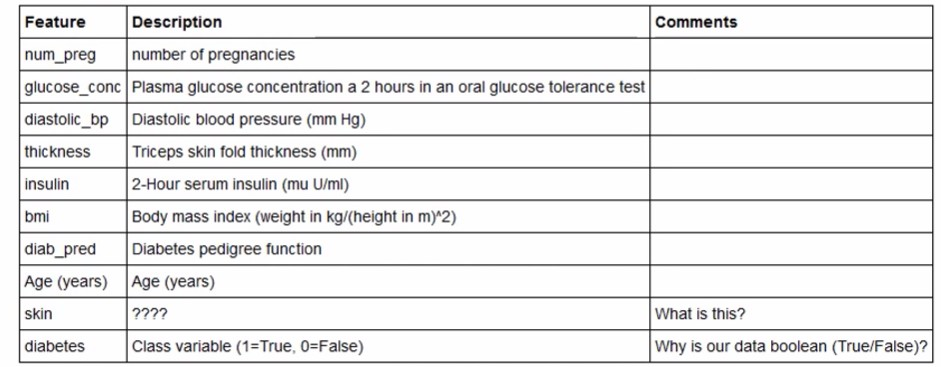

###**Check for Null Values**
###Returns a single Boolean telling you whether any Value in the entire DataFrame df is missing (NaN/None)

###bool(...) Wraps the final result in Python’s built‑in bool type.
###This converts NumPy’s True/False (e.g., np.False_) into a clean Python True or False, which is what you see printed in Colab.

In [ ]:
bool(df.isnull().any().any())


False

###**Correlated Feature Check**
###Helper function that displays correlation by color.

### Defines a function named “**plot_corr**” that takes a pandas DataFrame “**df**” and an optional size parameter to control the width and height of the plot.

### **corr = df.corr()** computes the **Correlation Matrix** of all Numeric Columns in df. The result **corr** is another DataFrame where each cell (i,j) is the **correlation coefficient** between column i and column j (values typically between **-1** and **1** ).

### **fig, ax = plt.subplots(figsize=(size, size))** Creates a new Matplotlib figure (fig) and a single set of axes (ax). **figsize=(size, size)** makes the **plot Square** and large enough to read all labels.

### **ax.matshow(corr)** draws the **Correlation Matrix** as a Colored Grid (heatmap like image) on the axes. Higher positive correlations usually appear as one color, negative as another, depending on the default colormap.

### **plt.xticks(range(len(corr.columns)), corr.columns)** sets the **x axis** tick positions to 0, 1, 2, … and labels them with the names of the columns in corr (i.e., the original DataFrame’s column names). This lets you see which feature each column of the matrix corresponds to.
### **plt.yticks(range(len(corr.columns)), corr.columns)** Does the same for the **y axis** ticks and labels.Now each cell at row i, column j visually shows the correlation between feature i and feature j.






In [ ]:
def plot_corr(df, size=11):
  corr = df.corr()    # data frame correlation function
  fig, ax = plt.subplots(figsize=(size, size))
  ax.matshow(corr)   # color code the rectangles by correlation value
  plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
  plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

### **plot_corr(df)** computes all pairwise correlations between your numeric features. Visualizes them as a square matrix where color intensity shows how strongly two features are related. Helps quickly spot **Highly Correlated Features** (e.g., *candidates for removal due to multicollinearity in ML*).

###Bright yellow - 1.0, i.e., perfect positive correlation
**Yellow green / turquoise** - Moderate to high positive correlation.
**Mid blue / teal shades** - Low or near zero correlation (around 0 to ±0.2). Features with these colors are mostly unrelated linearly.
**Dark purple / very dark colors** - These indicate negative correlation. The darker the purple, the more strongly negative (down to -1.0).
More yellow/bright ⇒ stronger positive relationship; more dark/purple ⇒ stronger negative; middle/green blue ⇒ weak or no relationship


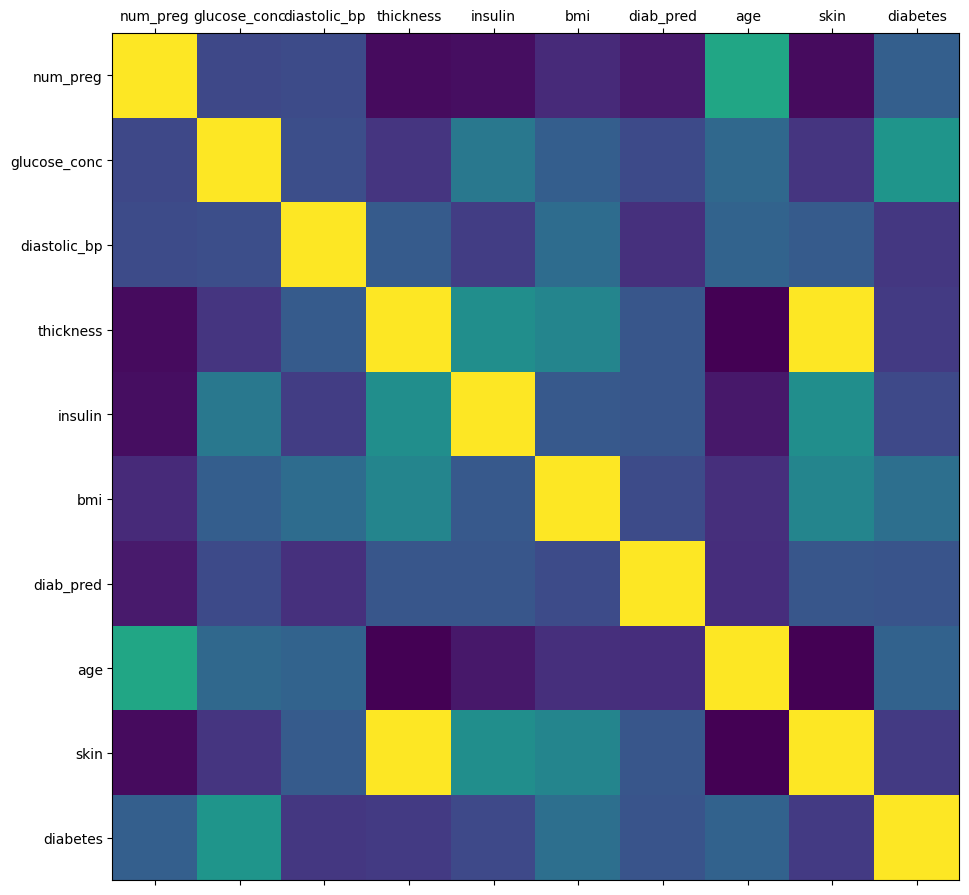

In [ ]:
plot_corr(df)

###  Actual **correlation coefficients** that correspond to those colors

### **Skin** and **Thickness** Has Correlation Coefficients as 1.0. We Can drop one of this Column.

###When **two features** are **very strongly correlated**, they often **carry** almost the **same information**, and in many ML models (especially linear ones) it is *better to drop one of them so the model stays stable and easier to interpret.*

In [ ]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


#**Drop the Skin Column**

In [ ]:
del df['skin']

In [ ]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


### **Check** for Any other **High Correlation**

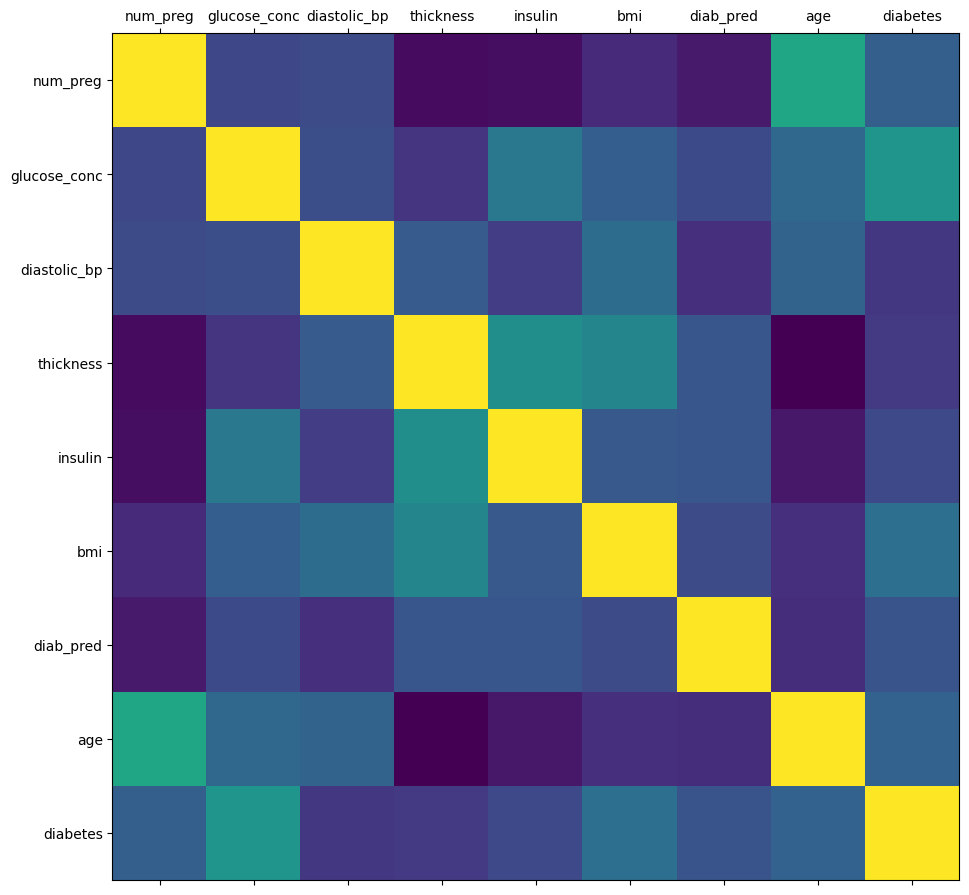

In [ ]:
plot_corr(df)

### The Data looks good.

### **Mold** the **Data** now !
### Inspect all the **Data Types** to see if there are any issues. Data should be **Numeric.**

### Algorithms operate on **Vectors** of **Numbers**, so by the time data reaches model.fit(X, y), **All Features** must be **Numeric** (floats/ints or numeric arrays).
### This includes:
### **Text/categorical columns** (city, gender, category, etc.) → must be encoded (one hot, label, target encoding, etc.)
### **Boolean** columns (True/False) are typically stored as **0/1** and are already numeric.

In [ ]:
df.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
5,5,116,74,0,0,25.6,0.201,30,False
6,3,78,50,32,88,31.0,0.248,26,True
7,10,115,0,0,0,35.3,0.134,29,False
8,2,197,70,45,543,30.5,0.158,53,True
9,8,125,96,0,0,0.0,0.232,54,True


### Change Data Type of **diabetes** from boolean to integer, **True=1**, **False=0**

### Pandas Deal with Huge Table of Data very Fast and Simple.

In [ ]:
df['diabetes'] = df['diabetes'].astype(int)

In [ ]:
df.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#**Check Class Distribution**

### **num_obs = len(df)**, len(df) gives the total number of rows (observations) in the DataFrame df.
### **num_true = len(df.loc[df['diabetes'] == 1])**
      #### df['diabetes'] == 1 creates a Boolean mask that is True where diabetes = 1.
      ### df.loc[mask] selects only those rows where the mask is True (patients with diabetes = 1).
      ### len(...) counts how many such rows there are → number of “True” diabetes cases.
### **num_false = len(df.loc[df['diabetes'] == 0])**, Same idea, but selects rows where diabetes = 0 → number of “False” cases (no diabetes).


In [ ]:
num_obs = len(df)
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


### A **Standard Prediction Model** will work good here as We have 35% True Cases and 65% False cases

### **Programmatic way** to list all estimators in your installed version
### There is no fixed, small number of “**ML algorithm**s” in **scikit‑learn**; the library exposes hundreds of **estimators** (classifiers, regressors, clustering methods, transformers, etc.), and the *exact count changes as new versions add or deprecate models*

In [ ]:
from sklearn.utils.discovery import all_estimators

estimators = all_estimators()          # all estimators
len(estimators)                        # how many in THIS version

207

#**Spliting the Data**
#####70% for training, 30% for testing

In [ ]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#Define List
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

#Split the Data in Two Data Frames
X =  df[feature_col_names]   # predictor feature columns (8 X m)
y = df[predicted_class_names] # predicted class (1=true, 0=false) column (1 X m)

split_test_size = 0.30

# "train_test_split" function Splits the Orinial Dataframe and Returns Four Numpy Arrays of Data
# "random_state" sets the Seed for the Random Number Gnerator Used as part of the splitting process
# Setting the Seed as Constant Ensures, While rerunning the Function It will Split Identically
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)
                            # test_size = 0.3 is 30%, 42 is the answer to everything

# Check the desired **70% Train** and **30% Test** split of the data

In [ ]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


# Ensure the **Ratio** of *True and False* cases of **Diabetes** in the **Train and Test Datasets** is the same.

For the **Overall Data** before the Split:

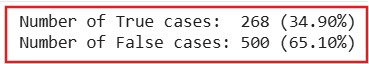

In [ ]:
# Creates a reusable function that accepts two parameters
# data: The dataframe you want to analyze (could be "df", "y_train", or "y_test")
# label: The descriptive label to print (e.g., "Original", "Training", "Test")
def print_distribution(data, label):

    # Counts the occurrences of each unique value in the "diabetes" column. Returns a series where:
    # Index = the values (0 and 1). Values = how many times each appears
    counts = data['diabetes'].value_counts()

    # Calculates the percentage distribution
    # "normalize=True" converts counts to "proportions (0.0 to 1.0)" instead of raw counts
    # " * 100 " converts proportions to percentages
    pcts = data['diabetes'].value_counts(normalize=True) * 100

    # Prints the label (e.g., "Original:", "Training:", "Test:") as a header
    print(f"{label}:")

    # Loops through both values in a specific order: first 1 (True), then 0 (False)
    # This ensures consistent output formatting regardless of how value_counts() orders them
    for val in [1, 0]:

        # {'True' if val else 'False':5s} - Conditional expression that:
         # Prints "True" if val == 1, otherwise "False"
          #:5s pads the text to 5 characters (right-aligns) for nice alignment
        # {counts[val]} - Retrieves the count for that value from the counts Series
        # {pcts[val]:.2f}% - Retrieves the percentage and formats it to 2 decimal places
        print(f"  {'True' if val else 'False':5s}: {counts[val]} ({pcts[val]:.2f}%)")

    print()

print_distribution(df, "Original")
print_distribution(y_train, "Training")
print_distribution(y_test, "Test")

Original:
  True : 268 (34.90%)
  False: 500 (65.10%)

Training:
  True : 188 (35.01%)
  False: 349 (64.99%)

Test:
  True : 80 (34.63%)
  False: 151 (65.37%)



### **Post-split Data Preparation**

In [ ]:
df.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Out of **768 Observations**, **374 Observations** have **Insulin Value** as **Zero**




In [ ]:
num_zero_insulin = (df['insulin'] == 0).sum()
print(num_zero_insulin)

374


In [ ]:
num_zero_thickness = (df['thickness'] == 0).sum()
print(num_zero_thickness)

227


# How many **Rows** have have **unexpected 0 values**?

In [ ]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


**Impute** with the **Mean**

In [ ]:
# "impute" is a submodule inside scikit-learn that contains tools for handling missing data
# "SimpleImputer" is a class in that submodule which can replace missing values (like NaN or a placeholder such as 0)
#  using strategies such as mean, median, most_frequent, or a constant value
from sklearn.impute import SimpleImputer

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

# Notice the missing_values=0 will be replaced by mean.  However, the num_preg can have a value of 0.
# To prevent replacing the 0 num_preg with the mean we need to skip imputing the 'num_preg' column
cols_not_num_preg = X_train.columns.difference(['num_preg']) # all columns but the num_preg column
pd.options.mode.chained_assignment = None  # Supress warning message on transformed assignment

#Compute the Mean Separately for Training and Test Datasets as The Values for the Data and Their Mean Would be Different
# impute the training data
X_train[cols_not_num_preg] = fill_0.fit_transform(X_train[cols_not_num_preg])
# impute the test data
X_test[cols_not_num_preg] = fill_0.transform(X_test[cols_not_num_preg])

# **Training** Initial Algorithm - **Naive Bayes**





In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

# Trains the Naive Bayes (or any sklearn) model using the training data "X_train" and the target labels from "y_train" converted to a 1D array
nb_model.fit(X_train, y_train.values.flatten())

GaussianNB()

#**Performance** on **Training Data**

In [ ]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7523



#**Performance** on **Testing Data**

In [ ]:
# Predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

# import the performance metrics library
from sklearn import metrics

# testing metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))


Accuracy: 0.7403


# **Metrics**
A **Confusion Matrix** is a table that shows how many predictions your classification model got right and wrong for each class by comparing actual labels with predicted labels

Default Position For **Scikit-learn Confusion Matrix**

**TN** = True Negative (Actual Not Diabetes and Predicted Not to be Diabetes)

**FP** = False Positive (Actual Not Diabetes and Predicted To Be Diabetes)

**TP** = True Positive (Actual Diabetes and Predicted To Be Diabetes)

**FN** = False Negative (Actual to be Diabetes and Predicted Not to Be Diabetes)

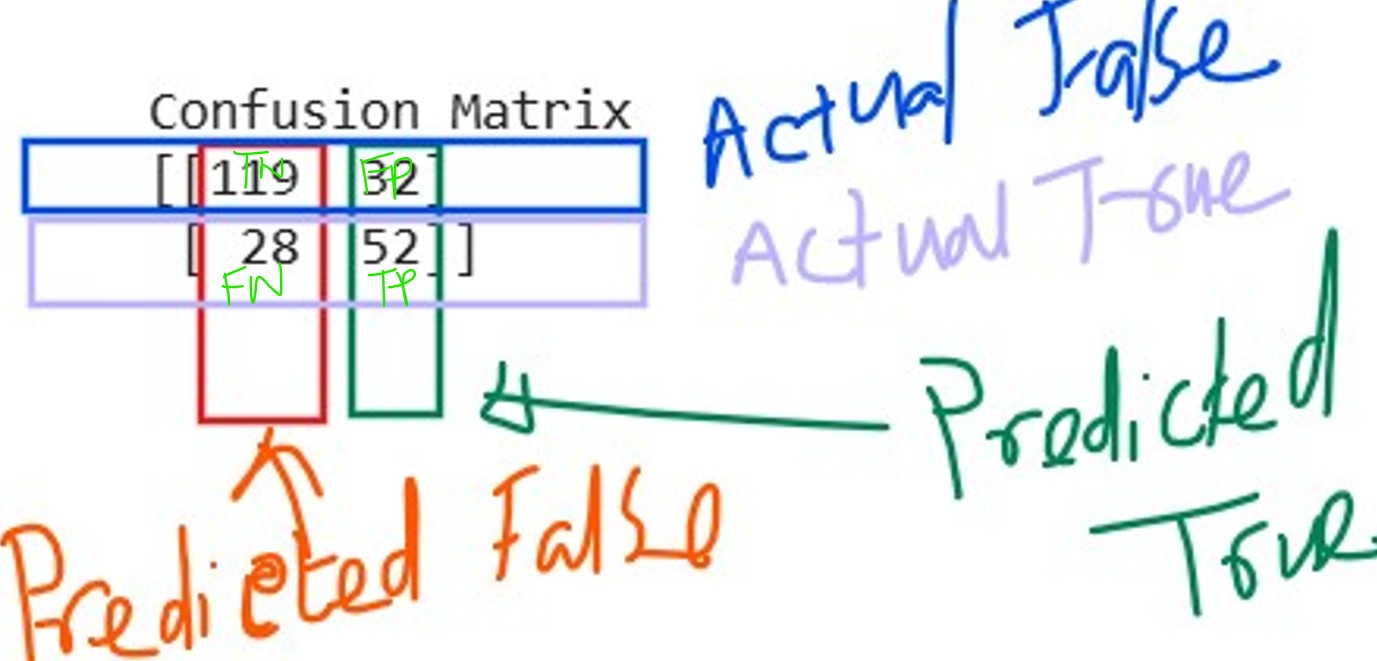





The **Classification Report** Summarizes *how well a Classification Model Performs* for Each Class using Key Metrics Derived from the Confusion Matrix

**Higher** *precision, recall*, and *F1-score* mean **Better Model Performance**

In [ ]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[119  32]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



# **Random Forest**

In [ ]:
#Imports the RandomForestClassifier class from scikit-learn’s ensemble module so you can build a random forest model
from sklearn.ensemble import RandomForestClassifier

# Creates a Random Forest classifier object named rf_model
# "n_estimators=10" means the forest will contain 10 decision trees; more trees usually give more stable and accurate predictions,
#  but increase computation cost (in practice, values like 100+ are common) "random_state=42" fixes the internal randomness (for bootstrapping samples and feature selection),
#  ensuring you get the same model each time you run the code with the same data, which is important for reproducibility
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)

# "y_train.values.flatten()" converts the target labels to a 1D NumPy array, which is the format sklearn expects for classification targets
rf_model.fit(X_train, y_train.values.flatten())




RandomForestClassifier(n_estimators=10, random_state=42)

# **Predict Training Data**

In [ ]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9851


# **Predict Testing Data**

In [ ]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7446


# **Metrics**

In [ ]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[125  26]
 [ 33  47]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



# **Training Data** has an **Accuracy** of **98.51%** whereas **Testing Data Accuracy** is at **74.46%**. This is a Classic Sign of **Algorithm Overfitting the Training Data**. That Means Model has Learned the Training Data Too Well.

# **Logistic Regression**

In [ ]:
# Imports the LogisticRegression class from scikit‑learn’s linear models module so it can be used to build a classifier
from sklearn.linear_model import LogisticRegression

# Creates a logistic regression classifier object named lr_model. C=0.7 controls regularization strength: it is the inverse of regularization;
# smaller C ⇒ stronger regularization (more penalty on large weights), Larger C ⇒ Weaker Regularization
# max_iter=10000 sets the maximum number of iterations allowed for the solver to converge, set high here to avoid convergence warnings on this dataset
lr_model =LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)

#.fit(...) trains the logistic regression model using the training features X_train and target labels y_train
# y_train.values.flatten() converts y_train (likely a pandas Series/DataFrame) to a 1D NumPy array with shape
lr_model.fit(X_train, y_train.values.flatten())

# Uses the trained model to predict class labels (0 or 1) for each sample in the test set X_test and stores them in lr_predict_test
lr_predict_test = lr_model.predict(X_test)

# Training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))



Accuracy: 0.7619
[[131  20]
 [ 35  45]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       151
           1       0.69      0.56      0.62        80

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.76      0.76      0.76       231



# The **Recall** Value is **0.56** which is Still lower
# Let us Set the **Regularization Parameter**

•	The While Loop will try C Value From 0 to 4.9 in Increments of 0.1

•	For Each C Value, Its Logistic Regression Object is Created and Trained with the Training Data and then Used to Predict the Test Results

•	Each Test Result is Computed and the Highest Recall Score is Recorded
   - That Score is Used to Get the C Value

•	We Also Plot the Recall Scores Versus Regularization Value To Get the Idea How the Recall Score Changes with Different Regularization Value

But Still Recall Value is Not Above 70%. It is 61.3%. What else can be done?

1st max value of 0.613 occured at C=2.900


Text(0, 0.5, 'recall score')

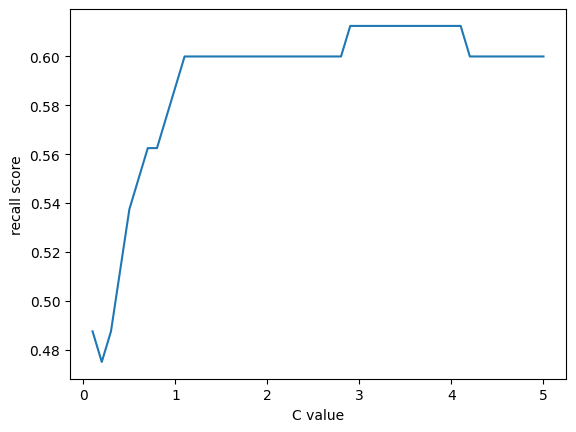

In [ ]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.values.flatten()) #.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

# **Logisitic Regression** with **class_weight='balanced**'

Our Data has more Non-diabetes than Diabetes Result

Let us tackle the Class Imbalance Issue by introducing the

**class_weight="balanced"**


1st max value of 0.738 occured at C=0.200


Text(0, 0.5, 'recall score')

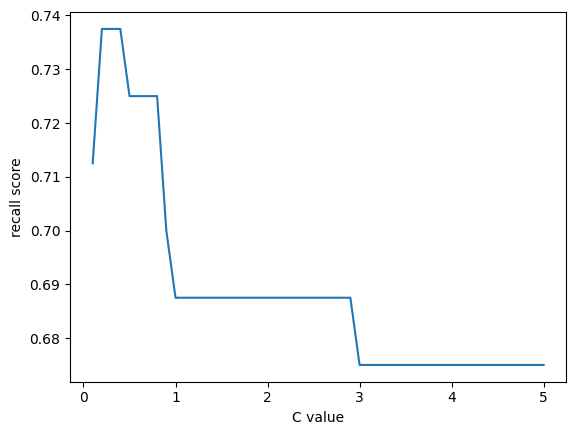

In [ ]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.values.flatten())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Run the **Logistics Regression **with **Two Changes**:

1. Set the C_val from the Best score above
2. Include the **class_weight="balanced**" *Hyperparameter*
The Changes worked, the **Recall Score** for **Class Diabetes** is **0.74**.


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train.values.flatten())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7186
[[107  44]
 [ 21  59]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       151
           1       0.57      0.74      0.64        80

    accuracy                           0.72       231
   macro avg       0.70      0.72      0.71       231
weighted avg       0.74      0.72      0.72       231

0.7375


 # **LogisticRegressionCV**

In [ ]:
#Imports LogisticRegressionCV, a version of logistic regression that performs CV internally to tune the regularization parameter C
from sklearn.linear_model import LogisticRegressionCV

# n_jobs=-1 - Uses all available CPU cores to run the cross‑validation folds in parallel, speeding up training
# random_state=42 sets a seed for any shuffling done inside the solver or CV so results are reproducible
# Cs=3 Tells LogisticRegressionCV to try 3 different values of C (inverse of regularization strength)
# Smaller C ⇒ stronger regularization;  larger C ⇒ weaker regularization
# cv=10 - Uses 10‑fold cross‑validation:the training data is split into 10 folds; each fold is used once as validation and 9 times as training,
# to evaluate each candidate C
# class_weight="balanced" - Automatically Adjusts class weights inversely proportional to class frequencies,
# giving more weight to the minority class (e.g., diabetics) to combat class imbalance
# max_iter= 500 - Sets the maximum number of optimization iterations; helps ensure convergence when the problem is harder
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500)

lr_cv_model.fit(X_train, y_train.values.flatten())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=500,
                     n_jobs=-1, random_state=42, refit=False)

# **Predict on Test data**

The Recall score is not that great but as we did Cross Validation so Real

world data will be predicted well

In [ ]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7100
[[111  40]
 [ 27  53]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       151
           1       0.57      0.66      0.61        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231

